In [1]:
#Read the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("/Users/chiragshah/Downloads/Documents/Semester 1/CA682 Data Visualization/Visualisation Assignment/Dataset/UK_HousingPrices.csv")

In [2]:
#drop Unnamed: 0 column
df.drop(columns='Unnamed: 0',inplace=True)

In [3]:
#data preparation --Begin
#Exploratory question : Identify the average housing price of the UK of each year. Select only top 5 cities.

#Columns required - Year, Price, Town/City, Transaction Unique Identifier

average_df=pd.DataFrame(df[['Transaction unique identifier','Price','Town/City','Year']])


In [4]:
#group by year and price mean to caculate entire UK average
avg=average_df.groupby(by='Year').mean()

In [5]:
#round to 2 decimal points
avg.Price=round(avg.Price,2)

In [6]:
avg.reset_index()
avg['Town/City']='UK Average'
avg=avg.reset_index()

In [7]:
#group by top 5 cities and price mean by each year
Top5CitiesAvg=average_df[average_df['Town/City'].isin(average_df['Town/City'].value_counts()[0:2].keys())].groupby(by=['Town/City','Year']).mean()

In [8]:
#reset index to loose group by columns
Top5CitiesAvg=Top5CitiesAvg.reset_index()

In [9]:
#combine top 5 cities averages and UK average by each year into one dataframe
UK_Avg=pd.concat([Top5CitiesAvg,avg])

#reconstruct index of new dataframe
UK_Avg.index=pd.RangeIndex(len(UK_Avg))

#data preparation --End

In [21]:
#check final prepared data
UK_Avg

,Town/City,Year,Price
0,BIRMINGHAM,1995,51332.973537
1,BIRMINGHAM,1996,51825.784376
2,BIRMINGHAM,1997,55774.519722
3,BIRMINGHAM,1998,58658.715066
4,BIRMINGHAM,1999,63519.954374
...,...,...,...
133,UK Average,2013,256852.380000
134,UK Average,2014,279107.480000
135,UK Average,2015,296040.920000
136,UK Average,2016,309769.170000


In [10]:
#save this dataframe to an output file to avoid future cleaning
UK_Avg.to_csv("/Users/chiragshah/Downloads/Documents/Semester 1/CA682 Data Visualization/Visualisation Assignment/Dataset/Final/lineplot.csv")

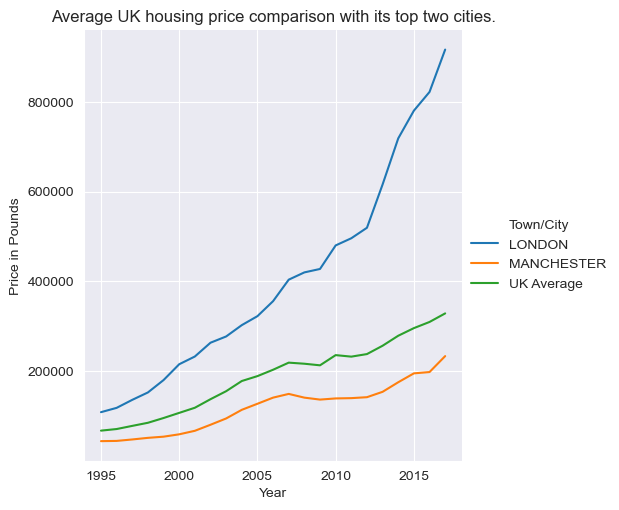

In [11]:
#plot a relative graph using seaborn
sns.set_style('darkgrid')
ax=sns.relplot(data=UK_Avg,kind="line",x="Year",y="Price",hue="Town/City")
ax.set(ylabel='Price in Pounds', xlabel='Year',title='Average UK housing price comparison with its top two cities.')
plt.show()
ax.savefig('Average.png')